In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving dataset_transacciones_sintetico.csv to dataset_transacciones_sintetico.csv


In [ ]:
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    print(f"Archivo cargado: {file_name}")
    print(df.head())

Archivo cargado: dataset_transacciones_sintetico.csv
  transaction_id  amount  is_foreign  is_online device_type  customer_age  \
0      TX0000000   37.54           0          1     desktop            73   
1      TX0000001  240.81           0          0      mobile            38   
2      TX0000002  105.34           0          0      tablet            18   
3      TX0000003   73.04           0          0      mobile            69   
4      TX0000004   13.57           0          0     desktop            20   

   account_age_days merchant_category  amount_deviation  is_fraud  \
0              3318     entertainment            -47.81         0   
1              2778            travel            -29.36         0   
2               417       electronics            -28.84         0   
3              3208     entertainment             42.84         0   
4              1855       electronics            -58.74         0   

   transaction_day  location_risk_score  merchant_risk_score customer

In [ ]:
df = pd.read_csv("dataset_transacciones_sintetico.csv")

In [ ]:
categorical_cols = ['device_type', 'merchant_category', 'customer_segment',
                    'email_domain_type', 'customer_tenure_level', 'txn_hour_category']

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop(columns=['transaction_id', 'amount', 'is_fraud'])  # Predictoras
y = df['amount']

In [ ]:
print(df.head())

  transaction_id  amount  is_foreign  is_online  device_type  customer_age  \
0      TX0000000   37.54           0          1            0            73   
1      TX0000001  240.81           0          0            1            38   
2      TX0000002  105.34           0          0            2            18   
3      TX0000003   73.04           0          0            1            69   
4      TX0000004   13.57           0          0            0            20   

   account_age_days  merchant_category  amount_deviation  is_fraud  \
0              3318                  2            -47.81         0   
1              2778                  4            -29.36         0   
2               417                  1            -28.84         0   
3              3208                  2             42.84         0   
4              1855                  1            -58.74         0   

   transaction_day  location_risk_score  merchant_risk_score  \
0                6                31.13       

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
def eval_regression(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred, squared=False),
        'R2': r2_score(y_true, y_pred)
    }

In [ ]:
def eval_regression(y_true, y_pred):
    # Calculate MSE and then take the square root for RMSE if squared parameter is not available
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': rmse,  # Use calculated RMSE
        'R2': r2_score(y_true, y_pred)
    }

In [ ]:
import numpy as np

In [ ]:
model_svr = SVR(kernel='rbf', C=100)
model_svr.fit(X_train, y_train)
pred_svr = model_svr.predict(X_test)
metrics_svr = eval_regression(y_test, pred_svr)


In [ ]:
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
metrics_xgb = eval_regression(y_test, pred_xgb)

In [ ]:
model_nn = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300)
model_nn.fit(X_train, y_train)
pred_nn = model_nn.predict(X_test)
metrics_nn = eval_regression(y_test, pred_nn)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
metrics_lr = eval_regression(y_test, pred_lr)

In [ ]:
print("Regresión Lineal:", metrics_lr)
print("SVM Regressor:", metrics_svr)
print("XGBoost Regressor:", metrics_xgb)
print("Neural Network Regressor:", metrics_nn)

Regresión Lineal: {'MAE': 57.091475760060916, 'RMSE': np.float64(76.24309141697468), 'R2': -0.001781077758132632}
SVM Regressor: {'MAE': 56.62133806732817, 'RMSE': np.float64(81.61308066516675), 'R2': -0.14786647743002512}
XGBoost Regressor: {'MAE': 61.48978038664977, 'RMSE': np.float64(82.62260397026563), 'R2': -0.17643946841231628}
Neural Network Regressor: {'MAE': 60.44458621071166, 'RMSE': np.float64(81.08418981959265), 'R2': -0.1330372629461296}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
metrics_all = {
    'Regresión Lineal': metrics_lr,
    'SVM': metrics_svr,
    'XGBoost': metrics_xgb,
    'Red Neuronal': metrics_nn
}

In [ ]:
metrics_df = pd.DataFrame(metrics_all).T  # Transpuesta para que los modelos sean las filas
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Modelo'}, inplace=True)

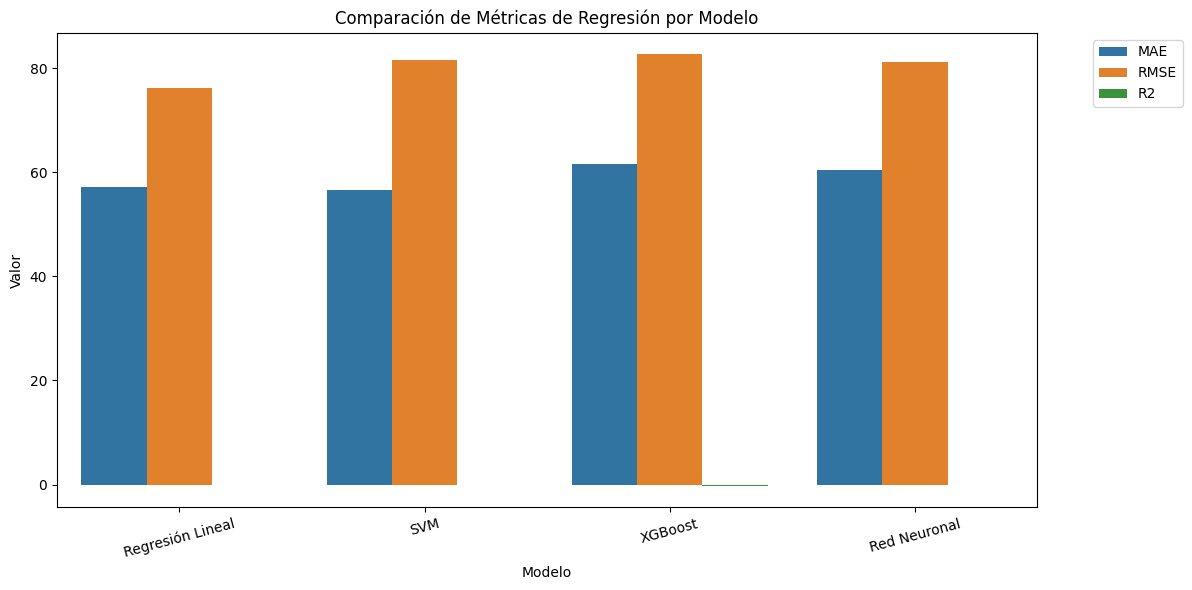

In [ ]:
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
sns.barplot(data=metrics_melted, x='Modelo', y='Valor', hue='Métrica')
plt.title('Comparación de Métricas de Regresión por Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

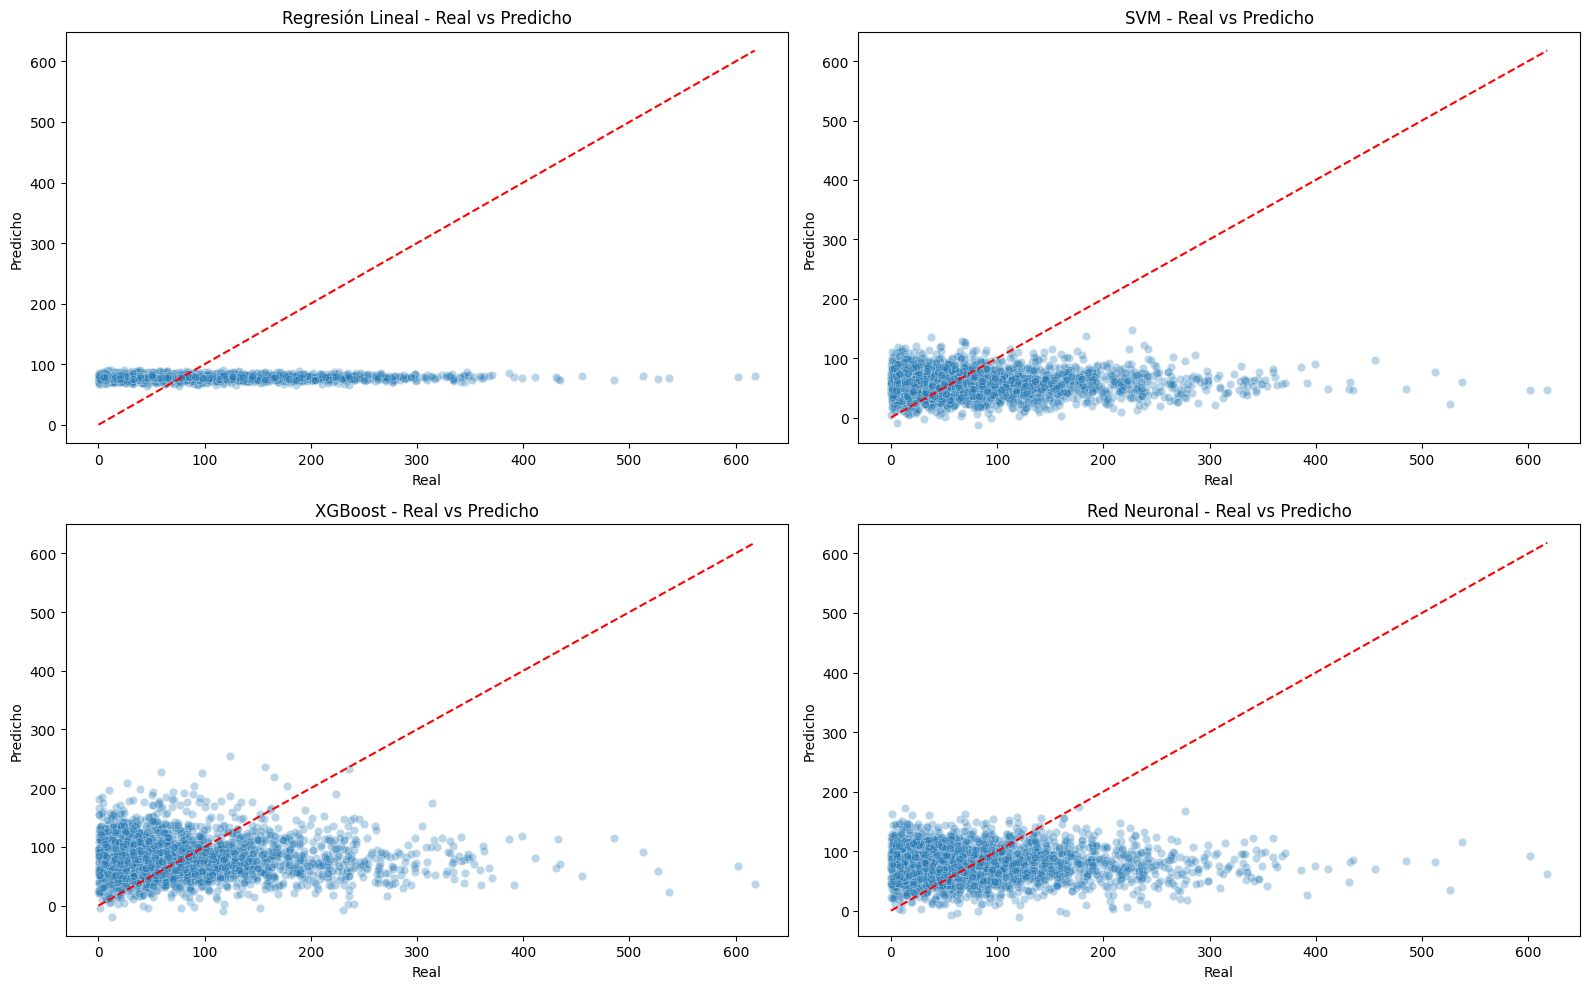

In [ ]:
model_preds = {
    'Regresión Lineal': pred_lr,
    'SVM': pred_svr,
    'XGBoost': pred_xgb,
    'Red Neuronal': pred_nn
}
plt.figure(figsize=(16, 10))
for i, (name, pred) in enumerate(model_preds.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
    plt.title(f'{name} - Real vs Predicho')
    plt.xlabel('Real')
    plt.ylabel('Predicho')

plt.tight_layout()
plt.show()